In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import bliss
from bliss.datasets.central_sim import create_central_sim_dataset

from bliss.datasets.lsst import prepare_final_galaxy_catalog, get_default_lsst_psf

import matplotlib.pyplot as plt
import numpy as np 

In [ ]:
bp = 24
tile_slen = 5

In [ ]:
cat = prepare_final_galaxy_catalog()
psf = get_default_lsst_psf()
len(cat)

575903

In [ ]:
ds = create_central_sim_dataset(n_samples=100, catsim_table=cat, psf=psf, slen=35, max_n_sources=10)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:12<00:00,  7.72it/s]


In [ ]:
ds.keys()

dict_keys(['images', 'noiseless', 'paddings', 'uncentered_sources', 'centered_sources', 'plocs', 'n_sources', 'galaxy_bools', 'galaxy_params', 'star_bools', 'star_fluxes'])

In [ ]:
images = ds['images']
noiseless = ds['noiseless']
uncentered_sources = ds['uncentered_sources']
paddings = ds['paddings']
images.shape, noiseless.shape, uncentered_sources.shape, paddings.shape

(torch.Size([100, 1, 83, 83]),
 torch.Size([100, 1, 83, 83]),
 torch.Size([100, 10, 1, 83, 83]),
 torch.Size([100, 1, 83, 83]))

In [ ]:
ds['galaxy_params'][:, 0, -2]

tensor([24.6759, 24.3084, 24.4722, 24.2775, 22.4921, 23.7439, 24.1557, 23.4771,
        24.5915, 23.8527, 23.7569, 24.6001, 24.9245, 24.2913, 25.2153, 25.2347,
        24.2434, 25.0779, 23.0820, 23.5729, 25.0821, 24.0635, 25.2229, 24.4495,
        25.0233, 23.5720, 25.0604, 24.6023, 20.4833, 22.6233, 25.1160, 24.1764,
        24.1872, 24.6115, 25.2245, 24.6815, 23.8683, 25.2993, 23.5979, 24.5580,
        23.3477, 23.7775, 24.6178, 25.0294, 24.8331, 24.0170, 25.2522, 24.8001,
        24.4096, 22.4789, 23.7715, 24.8393, 24.3754, 24.0761, 24.6158, 23.2372,
        24.8654, 23.8379, 23.9168, 24.4497, 23.4454, 25.2325, 25.1177, 25.0596,
        21.9348, 24.9662, 25.0866, 23.6590, 24.7709, 24.5937, 24.4596, 24.2099,
        24.3943, 24.5352, 22.1096, 25.0972, 19.2506, 24.3701, 24.8471, 25.1294,
        23.9657, 23.7127, 23.6451, 24.7403, 22.7699, 24.9744, 25.0882, 25.1318,
        23.8767, 24.3604, 24.6496, 24.9869, 24.2391, 24.8807, 23.0529, 22.5415,
        23.9905, 24.0932, 24.6061, 25.16

In [ ]:
ds['plocs'][:, 0][:10]

tensor([[17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000],
        [17.5000, 17.5000]])

In [ ]:
ds['n_sources'][:]

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [ ]:
ds['plocs'].shape

torch.Size([100, 10, 2])

73


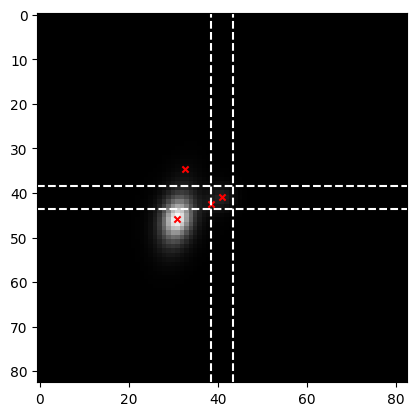

In [ ]:
idx = np.random.randint(0, len(ds['images']))
plt.imshow(noiseless[idx, 0] - paddings[idx,0], cmap='gray')
_plocs = ds['plocs'][idx]

for ii in range(ds['n_sources'][idx]):
    x = _plocs[ii, 1] + bp - 0.5
    y = _plocs[ii, 0] + bp - 0.5
    plt.scatter(x, y, color='red', s=20, marker='x')


# plot square in the middle corresponding to central tile of 5x5 pixels
plt.axvline(bp + 15 - 0.5, color='w', linestyle='--')
plt.axhline(bp + 15 - 0.5, color='w', linestyle='--')
plt.axhline(bp + 15 + 5 - 0.5, color='w', linestyle='--')
plt.axvline(bp + 15 + 5 - 0.5, color='w', linestyle='--')


print(idx)
# plt.axvline(83//2, color='red', linestyle='--')
# plt.axhline(83//2, color='red', linestyle='--')

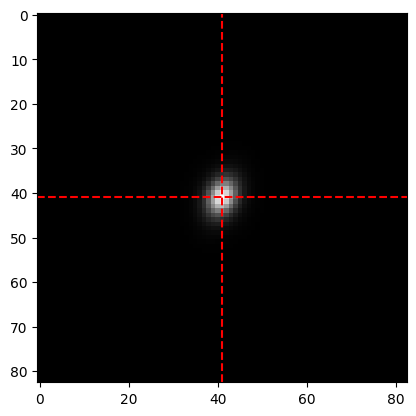

In [ ]:
plt.imshow(uncentered_sources[7, 0, 0], cmap='gray')
plt.axvline(83//2, color='red', linestyle='--')
plt.axhline(83//2, color='red', linestyle='--')

# Blendedness histogram

In [ ]:
ds = create_central_sim_dataset(n_samples=2000, catsim_table=cat, psf=psf, slen=35, max_n_sources=10)

  0%|          | 0/2000 [00:00<?, ?it/s]

 57%|█████▋    | 1135/2000 [01:49<01:23, 10.33it/s]


KeyboardInterrupt: 

In [ ]:
from bliss.reporting import get_blendedness

uncentered_sources = ds['uncentered_sources']
noiseless_no_padding = ds['noiseless'] - ds['paddings']

blendedness = get_blendedness(uncentered_sources, noiseless_no_padding)
blendedness.shape

torch.Size([2000, 10])

In [ ]:
# always the first one 
bld = blendedness[:, 0]

Text(0.5, 0, 'Blendedness')

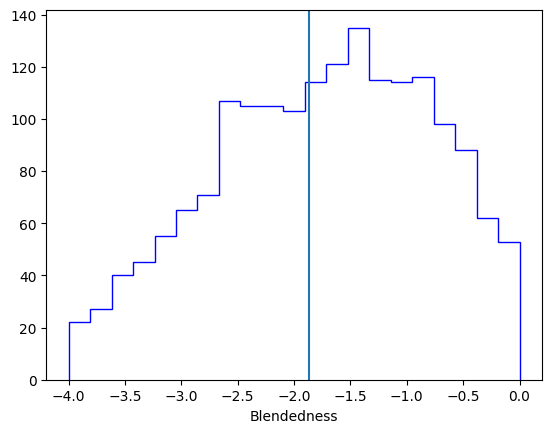

In [ ]:
plt.hist(bld.log10(), bins=21, range=(-4, 0.0), histtype='step', color='blue')
plt.axvline(bld.log10().nanmedian())
plt.xlabel('Blendedness')


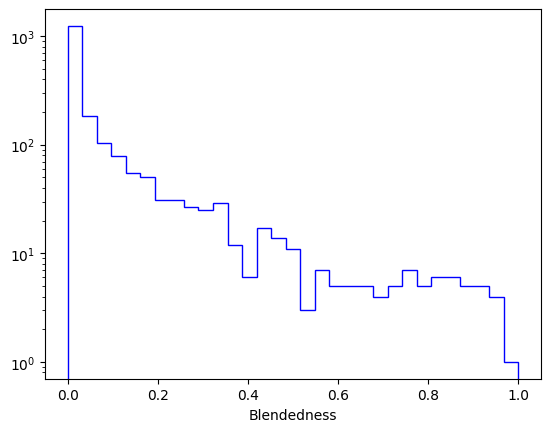

In [ ]:
plt.hist(bld, bins=31, range=(0, 1), histtype='step', color='blue')
plt.xlabel('Blendedness')
plt.yscale('log')

In [ ]:
ds['n_sources'][:].float().mean()

tensor(3.1475)